In [ ]:
from cdt.data import AcyclicGraphGenerator
# generator = AcyclicGraphGenerator('polynomial', npoints=1000, nodes=5)
# data, graph = generator.generate()
# generator.to_csv('generate_data1')

/home/zw/anaconda3/envs/py2r/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


           V0        V1        V2        V3        V4
0   -1.905176  0.866327  0.384273  3.301410  0.380930
1   -2.096007  0.739090 -1.423411  0.374298  0.553158
2   -1.950473  0.508924 -0.052780 -0.201064  0.692514
3   -2.045461  0.019444 -0.426938 -1.499411  0.222025
4   -2.113016  0.783528 -0.404429 -0.292533 -0.900442
..        ...       ...       ...       ...       ...
995  0.712122  0.179043 -0.949546 -0.978285  1.263161
996  0.869255  0.358142 -1.379672 -0.379250  1.560798
997  0.319823  0.265008  0.237426  0.762598 -0.189660
998  0.726536  0.313199 -0.439376 -0.388325  0.732723
999  0.668719  0.184861  0.303891  1.694173 -0.378018

[1000 rows x 5 columns]
['V0', 'V1', 'V2', 'V3', 'V4']


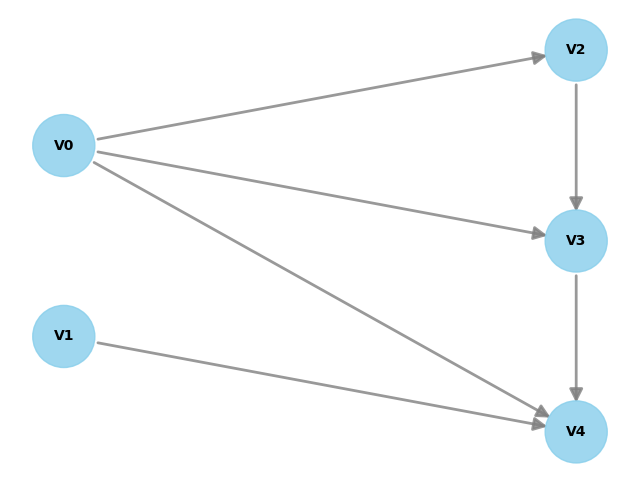

In [1]:
from dowhy import CausalModel
import pandas as pd
import networkx as nx

# data pre-processing
dataset = "generate_data1"
feature = pd.read_csv(f"./{dataset}_data.csv")
print(feature)
graph = pd.read_csv(f"./{dataset}_target.csv")
edge_list = []
columns = list(feature.columns)
print(columns)
adj = graph.to_numpy()
for i in range(len(columns)):
    for j in range(len(columns)):
        if adj[i, j] != 0:
            edge_list.append((columns[i], columns[j]))

causal_graph = nx.DiGraph()
causal_graph.add_edges_from(edge_list)

# Without graph
model= CausalModel(
        data=feature,
        treatment=["Altitude"],
        outcome=["Temperature"],
        graph=causal_graph)

model.view_model()


In [18]:

for node_i in columns:
    for node_j in columns:
        if node_i == node_j:
            continue
        model= CausalModel(
            data=feature,
            treatment=node_i,
            outcome=node_j,
            graph=causal_graph)
        identified_estimand = model.identify_effect()
        causal_estimate = model.estimate_effect(identified_estimand,
                method_name="backdoor.linear_regression")
        effct = "无影响"
        if causal_estimate.value > 0:
            effect = "激活"
        else:
            effect = "抑制"
        if adj[int(node_i[-1]), int(node_j[-1])] == 1:
            log = f"问题:{node_i}是否是导致{node_j}变化或发生的直接原因？干预{node_i}对{node_j}的影响是激活、抑制还是无影响？回答问题并提供相应依据。\n参考信息：在因果图中存在一条从{node_i}(原因)指向{node_j}(结果)的边，干预{node_i}对{node_j}的平均处理效应(ATE)是{causal_estimate.value}。\n答案: {node_i}(原因)是导致{node_j}(结果)变化或者发生的直接原因，干预{node_i}对{node_j}的影响是{effect}。\n"
        else:
            log = f"问题:{node_i}是否是导致{node_j}变化或发生的直接原因？干预{node_i}对{node_j}的影响是激活、抑制还是无影响？回答问题并提供相应依据。\n参考信息：在因果图中不存在一条从{node_i}(原因)指向{node_j}(结果)的边，干预{node_i}对{node_j}的平均处理效应(ATE)是{causal_estimate.value}。\n答案: {node_i}(原因)不是导致{node_j}(结果)变化或者发生的直接原因，干预{node_i}对{node_j}的影响是{effect}。\n"
        print(log)
        # print(f"{node_i}->{node_j}, ATE:{causal_estimate.value}")
    

问题:V0是否是导致V1变化或发生的直接原因？干预V0对V1的影响是激活、抑制还是无影响？回答问题并提供相应依据。
参考信息：在因果图中不存在一条从V0(原因)指向V1(结果)的边，干预V0对V1的平均处理效应(ATE)是0。
答案: V0(原因)不是导致V1(结果)变化或者发生的直接原因，干预V0对V1的影响是抑制。

问题:V0是否是导致V2变化或发生的直接原因？干预V0对V2的影响是激活、抑制还是无影响？回答问题并提供相应依据。
参考信息：在因果图中存在一条从V0(原因)指向V2(结果)的边，干预V0对V2的平均处理效应(ATE)是-0.3114559601551693。
答案: V0(原因)是导致V2(结果)变化或者发生的直接原因，干预V0对V2的影响是抑制。

问题:V0是否是导致V3变化或发生的直接原因？干预V0对V3的影响是激活、抑制还是无影响？回答问题并提供相应依据。
参考信息：在因果图中存在一条从V0(原因)指向V3(结果)的边，干预V0对V3的平均处理效应(ATE)是-0.024614901177900567。
答案: V0(原因)是导致V3(结果)变化或者发生的直接原因，干预V0对V3的影响是抑制。

问题:V0是否是导致V4变化或发生的直接原因？干预V0对V4的影响是激活、抑制还是无影响？回答问题并提供相应依据。
参考信息：在因果图中存在一条从V0(原因)指向V4(结果)的边，干预V0对V4的平均处理效应(ATE)是-0.09718148468252356。
答案: V0(原因)是导致V4(结果)变化或者发生的直接原因，干预V0对V4的影响是抑制。

问题:V1是否是导致V0变化或发生的直接原因？干预V1对V0的影响是激活、抑制还是无影响？回答问题并提供相应依据。
参考信息：在因果图中不存在一条从V1(原因)指向V0(结果)的边，干预V1对V0的平均处理效应(ATE)是0。
答案: V1(原因)不是导致V0(结果)变化或者发生的直接原因，干预V1对V0的影响是抑制。

问题:V1是否是导致V2变化或发生的直接原因？干预V1对V2的影响是激活、抑制还是无影响？回答问题并提供相应依据。
参考信息：在因果图中不存在一条从V1(原因)指向V2(结果)的边，干预V1对V2的平均处理效应(ATE)是0。
答案: V1(原因)不是导致V2(结果)变化或者发